In [111]:
import numpy as np  # as always import the nesscary packages / libraries. 
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chisquare


In [112]:
class DataTransform: # use the DataTransfrom class change to the right dtypes form the .csv df. 
    def __init__(self, df):
        if not isinstance(df, pd.DataFrame):
            raise ValueError("Input must be a Pandas DataFrame.")
        self.df = df

    def change_dtypes(self, dtype_dict):
        try:
            for column, dtype in dtype_dict.items():
                if column in self.df.columns:
                    if dtype == "datetime64":
                        self.df[column] = pd.to_datetime(self.df[column], errors='coerce')
                    elif dtype == "boolean":
                        self.df[column] = self.df[column].map({'y': True, 'n': False})
                    else:
                        self.df[column] = self.df[column].astype(dtype, errors='ignore')
                else:
                    raise KeyError(f"Column '{column}' not found in DataFrame.")
            return self.df
        except Exception as e:
            raise RuntimeError(f"Error whilst changing datatypes: {e}")

if __name__ == "__main__":
    df_og = pd.read_csv("/Users/max/coding_resources/finance_loan_project/flp_df/flp_df7_4analysis.csv")

    transformer = DataTransform(df_og)

    dtype_dict = {
        "id": "int64",
        "member_id": "int64",
        "loan_amount": "float64",
        "term": "category",
        "int_rate": "float64",
        "grade": "category",
        "sub_grade": "category",
        "employment_length": "category",
        "home_ownership": "category",
        "annual_inc": "float64",
        "verification_status": "category",
        "issue_date": "datetime64",
        "loan_status": "category",
        "payment_plan": "bool",
        "purpose": "category",
        "dti": "float64",
        "delinq_2yrs": "int64",
        "earliest_credit_line": "datetime64",
        "inq_last_6mths": "int64",
        "open_accounts": "int64",
        "total_accounts": "int64",
        "out_prncp": "float64",
        "total_payment": "float64",
        "total_rec_int": "float64",
        "total_rec_late_fee": "float64",
        "recoveries": "float64",
        "collection_recovery_fee": "float64",
        "last_payment_date": "datetime64",
        "last_payment_amount": "float64",
        "last_credit_pull_date": "datetime64",
        "collections_12_mths_ex_med": "category",
        "policy_code": "int64",
        "application_type": "category"
    }

    df_fin_x = transformer.change_dtypes(dtype_dict)

df_fin = df_fin_x.drop(columns=["Unnamed: 0"])

print(df_fin)

             id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      13297208   15339420       8950.0         8950.0             8950.0   
1      10234817   12096968      11200.0        11200.0            11200.0   
2      10234813   12096964       8400.0         8400.0             8400.0   
3      10234796   12096947       9600.0         9600.0             9600.0   
4      10234755   12096906      15000.0        12000.0            15000.0   
...         ...        ...          ...            ...                ...   
20493    121673     121283       4500.0         4500.0             3000.0   
20494    120215     118760       4000.0         4000.0             3575.0   
20495    112245     112227       5000.0         5000.0             3975.0   
20496    111227     111223      20000.0        20000.0             2800.0   
20497     88046      88023       4400.0         4400.0             1400.0   

            term   int_rate  instalment grade sub_grade  ... total_rec_int 

In [114]:
class Plotter:
    def __init__(self, dataframe, default_palette="viridis"):
        self.dataframe = dataframe
        self.color_palette = sns.color_palette(default_palette)
        sns.set_style("whitegrid")

    def scatterplot(self, x, y, figsize=(8, 6), hue=None, palette=None):
        plt.figure(figsize=figsize)
        sns.scatterplot(data=self.dataframe, x=x, y=y, hue=hue, 
                        palette=palette or self.color_palette)
        plt.title(f"Scatterplot of {x} vs {y}")
        plt.show()

    def histogram(self, column, figsize=(8, 6), hue=None, bins=25, palette=None,title=None):
        plt.figure(figsize=figsize)
        sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True, 
                     hue=hue, palette=palette or self.color_palette)
        plt.title(title or f"Histogram of {column}")
        plt.show()

    def barplot(self, x, y, hue=None, figsize=(12, 6), palette=None, title=None, hue_order=None):
        plt.figure(figsize=figsize)
        sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette,
                    hue_order=hue_order)
        plt.title(title or f"Barplot of {y} by {x}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def boxplot(self, x, y, hue=None, figsize=(12, 6), box_width=0.5, palette=None):
        plt.figure(figsize=figsize)
        sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width, 
                    palette=palette or self.color_palette)
        plt.title(f"Boxplot of {y} by {x}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def stripplot(self, x, y, figsize=(8, 6), hue=None, palette=None):
        plt.figure(figsize=figsize)
        sns.stripplot(data=self.dataframe, x=x, y=y, hue=hue, jitter=True, 
                      palette=palette or self.color_palette)
        plt.title(f"Stripplot of {y} by {x}")
        plt.show()

    def jointplot(self, x, y, kind="scatter", height=6, hue=None, legend_fontsize=10, palette=None):
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, hue=hue, 
                          palette=palette or self.color_palette, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()

    def jointplotkde(self, x, y, kind="kde", hue=None, height=6, cmap="viridis", legend_fontsize=10):
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, cmap=cmap, hue=hue, fill=True, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()

    def pairplot(self, hue=None, palette=None):
        sns.pairplot(self.dataframe, hue=hue, palette=palette or self.color_palette)
        plt.suptitle("Pairplot", y=1.02)
        plt.show()

    def heatmap(self, figsize=(10, 8), cmap="viridis"):
        numeric_df = self.dataframe.select_dtypes(include=["number"])
        plt.figure(figsize=figsize)
        corr = numeric_df.corr()
        sns.heatmap(corr, annot=True, cmap=cmap, fmt=".2f")
        plt.title("Heatmap of Correlation Matrix")
        plt.show()

    def clustermap(self, figsize=(10, 8), cmap="viridis"):
        numeric_df = self.dataframe.select_dtypes(include=["number"])
        corr = numeric_df.corr()
        sns.clustermap(corr, annot=True, cmap=cmap, fmt=".2f", figsize=figsize)
        plt.show()

    def nulls_barplot(self, figsize=(8, 6), palette=["red", "green"]):
        total_nulls = self.dataframe.isna().sum().sum()
        total_values = self.dataframe.size - total_nulls
        data = pd.DataFrame({"Dcontent": ["Nulls", "Values"], "Count": [total_nulls, total_values]})
        plt.figure(figsize=figsize)
        sns.barplot(data=data, x="Dcontent", y="Count", hue="Dcontent", palette=palette)
        plt.title("Total Nulls vs Total Values")
        plt.ylabel("Count")
        plt.xlabel("")
        plt.show()
    
    def countplot(self, x, hue=None, figsize=(8, 6), palette=None, title=None, hue_order=None): # new coutplot in plotter class. 
        plt.figure(figsize=figsize)
        sns.countplot(data=self.dataframe, x=x,hue=hue,palette=palette or self.color_palette,
                      hue_order=hue_order)
        plt.title(title or f"Countplot of {x} by {hue}")
        plt.xlabel(x)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [70]:
print(df_fin['loan_status'].unique()) # checking the unique values in loan_status

['Current', 'Fully Paid', 'Late (31-120 days)', 'Charged Off', 'Late (16-30 days)', 'In Grace Period', 'Default', 'Does not meet the credit policy. Status:Fully..., 'Does not meet the credit policy. Status:Charg...]
Categories (9, object): ['Charged Off', 'Current', 'Default', 'Does not meet the credit policy. Status:Charg..., ..., 'Fully Paid', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)']


In [71]:

df_charged_off = df_fin[df_fin['loan_status'] == "Charged Off"]

df_late_early = df_fin[df_fin['loan_status'] == "Late (16-30 days)"]

df_late_late = df_fin[df_fin["loan_status"] == "Late (31-120 days)"]

df_late_both = df_fin[df_fin["loan_status"].isin(["Late (16-30 days)", "Late (31-120 days)"])]

df_default = df_fin[df_fin['loan_status'] == "Default"]

df_all_late_default = df_fin[df_fin['loan_status'].isin(["Late (16-30 days)", "Late (31-120 days)", "Default"])]

df_all_unpaid = df_fin[df_fin["loan_status"].isin(["Late (16-30 days)", "Late (31-120 days)", "Default", "Charged Off"])]

df_late_late_charged_off = df_fin[df_fin["loan_status"].isin(["Late (31-120 days)", "Charged Off"])]



*above* Here have created several df cotaining only specfic isolated categories of loan_status I will use in future analysis. 

In [72]:
def loan_status_percentages(df, categorical_column, status_column="loan_status"): 
    # above, here is a function to deduce % counts of loan_status cats, by chosen categorical col. 

    loan_status_order = [
        "In Grace Period",
        "Late (16-30 days)",
        "Late (31-120 days)",
        "Default",
        "Charged Off",
        "Current",
        "Fully Paid",
        "Does not meet the credit policy. Status:Charged Off",
        "Does not meet the credit policy. Status:Fully Paid"
    ] # list of the loan_status order I want to display results in. 

    
    grouped_counts = df.groupby([categorical_column, status_column]).size().unstack(fill_value=0)
    # above, group by the cat col then status col, .size gives you the value counts .unstack creates needed df shape, fills all Null with 0
    total_count = grouped_counts.sum(axis=1) # total sum acrross cols added
    percentage_df = (grouped_counts.div(total_count, axis=0) * 100).round(2) # work out the % of each going down the rows. 
    percentage_df.reset_index(inplace=True) # reser the index

    percentage_df = percentage_df[[categorical_column] + \
                                  [col for col in loan_status_order if col in percentage_df.columns]]
    # above, iterate down the cols if the col is in each loan_status_order cats, added the percentage of counts in the category. 

    return percentage_df



loan_status_percentages(df_fin, categorical_column="grade") # call function. 



/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_39719/2775387984.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby([categorical_column, status_column]).size().unstack(fill_value=0)


loan_status,grade,In Grace Period,Late (16-30 days),Late (31-120 days),Default,Charged Off,Current,Fully Paid,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid
0,A,0.16,0.04,0.24,0.00,2.33,31.17,65.90,0.04,0.12
1,B,0.44,0.12,1.03,0.08,4.24,40.75,53.15,0.01,0.18
2,C,0.57,0.15,1.05,0.07,7.83,40.21,49.75,0.07,0.31
3,D,0.88,0.29,1.38,0.25,8.76,37.66,50.21,0.04,0.54
4,E,0.90,0.13,1.03,0.13,11.79,34.87,50.00,0.00,1.15
5,F,0.00,0.00,0.65,0.00,11.69,28.57,55.19,0.00,3.90
6,G,0.00,0.00,0.00,0.00,17.65,35.29,47.06,0.00,0.00


*above* Here we have created a function to work out the % of loan_status category in each category of a serperate categorical variable
(sorry mouthfull). As we can see here it has been used to break down the % loan_status category each loan grade is composed off.
We can already deduce by from this the two 'Does not meet the credit policy' statuses form a very small % of each grade and are likely very small number of datapoints in general. We can see that the amount of 'Charged Off' loans % rises as each grade lowers. This is also true for 'Late (31-120 days)' or 'late late', and Late (16-30 days) or 'late early', as I will call them. However this only continues all the way to D grade and then reverses and the rise is not broadly linear like in 'Charged off' 

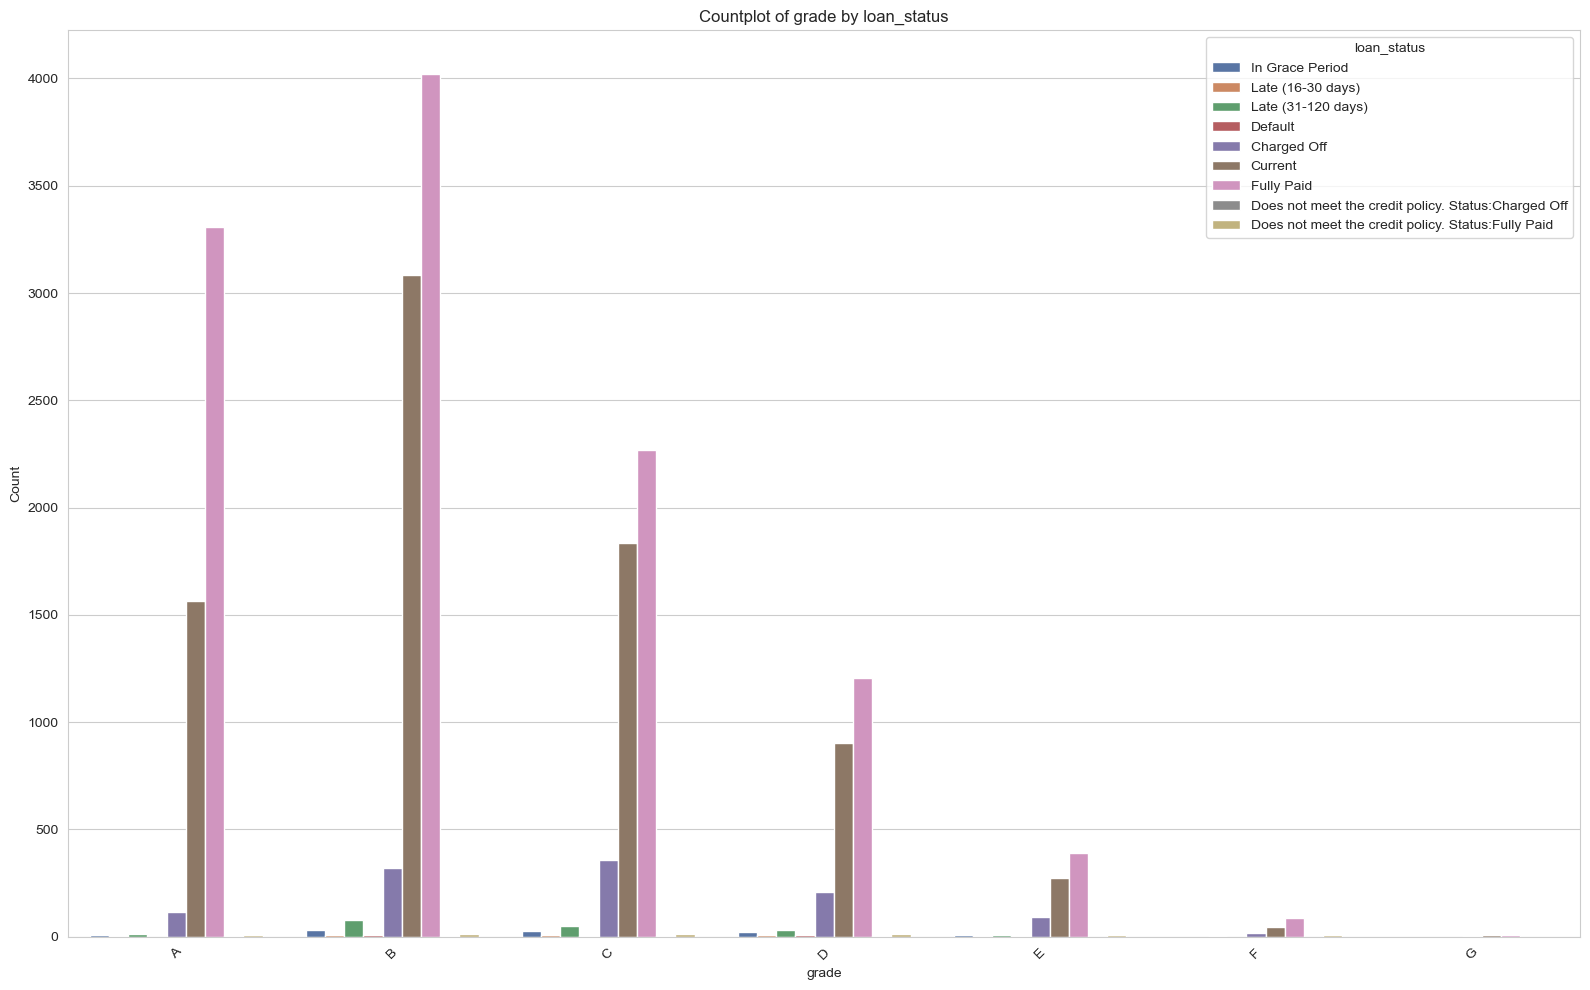

In [73]:

plotter = Plotter(df_fin)

hue_order1 = [
         "In Grace Period",
        "Late (16-30 days)",
        "Late (31-120 days)",
        "Default",
        "Charged Off",
        "Current",
        "Fully Paid",
        "Does not meet the credit policy. Status:Charged Off",
        "Does not meet the credit policy. Status:Fully Paid"
    ] # order I want the X axis to be displayed in.

plotter.countplot("grade", hue="loan_status", figsize=(16,10), hue_order=hue_order1, palette="deep")

*above* Here we can see firstly see how vastly bigger curret and fully paid are than all the other categoies. Default is basically non-existent and charged off is the biggest count wise out of all the unpaid categories. We can see here that loans of grade "B" are by far the vast majorty of loans And we can generally see the see the trend of charged off loans getting higher, but in pure numbers this only continues to grade C before declining. It is quite hard to see any of the other categories, but we can see late late rising between A and B and declining from there. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_39719/2775387984.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby([categorical_column, status_column]).size().unstack(fill_value=0)


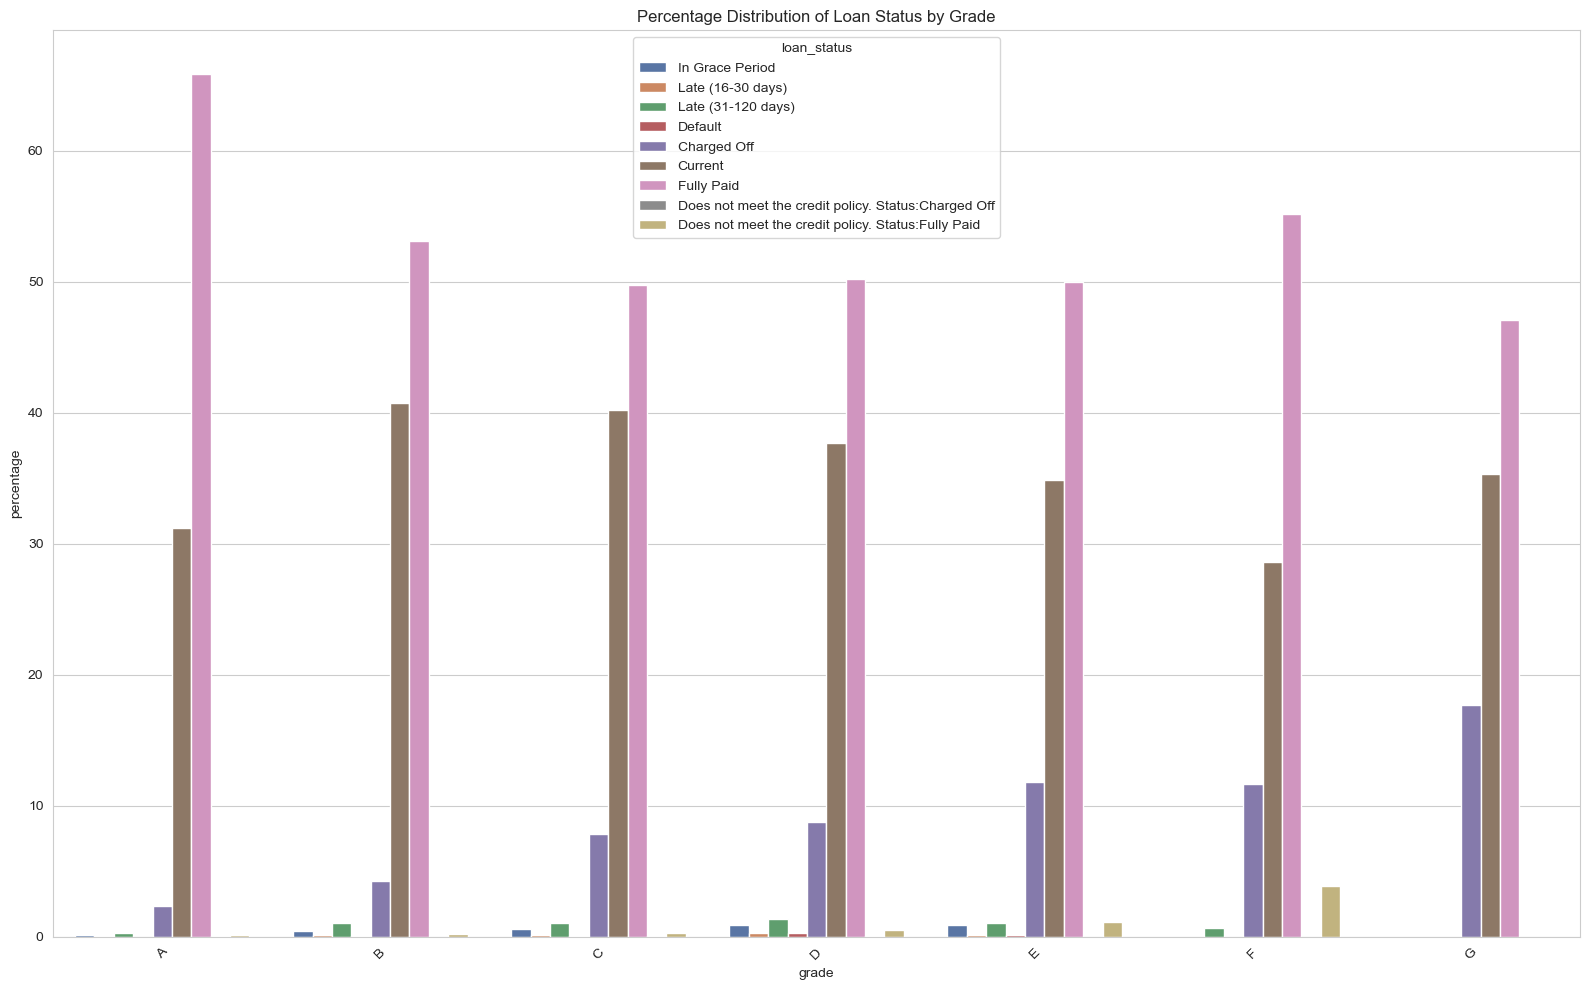

In [74]:

df_grade_barplot = loan_status_percentages(df_fin, categorical_column="grade")


melted_df_grade_barplot = df_grade_barplot.melt(id_vars=["grade"], var_name="loan_status", value_name="percentage")
# melt dtat so can be plotted in a barplot. 

plotter_grade = Plotter(melted_df_grade_barplot)

plotter_grade.barplot(
    x="grade",
    y="percentage",
    hue="loan_status",
    title="Percentage Distribution of Loan Status by Grade",
    figsize=(16, 10),
    palette="deep"
)


*above* Here we have grade by loan_status, but rather than using total number like in the countplot we have used a % to show proportion of the whole of the grade, to glean futher insight. Focussing on the unpaid catgories we can visualize the rise in Charged off loan proportion with the reduction in grade. we can see some differences in and a rise betwee the late late loans between A and B similar in B and C and small rise in D 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_39719/4138569390.py:101: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(data=self.dataframe, x=x,hue=hue,palette=palette or self.color_palette,


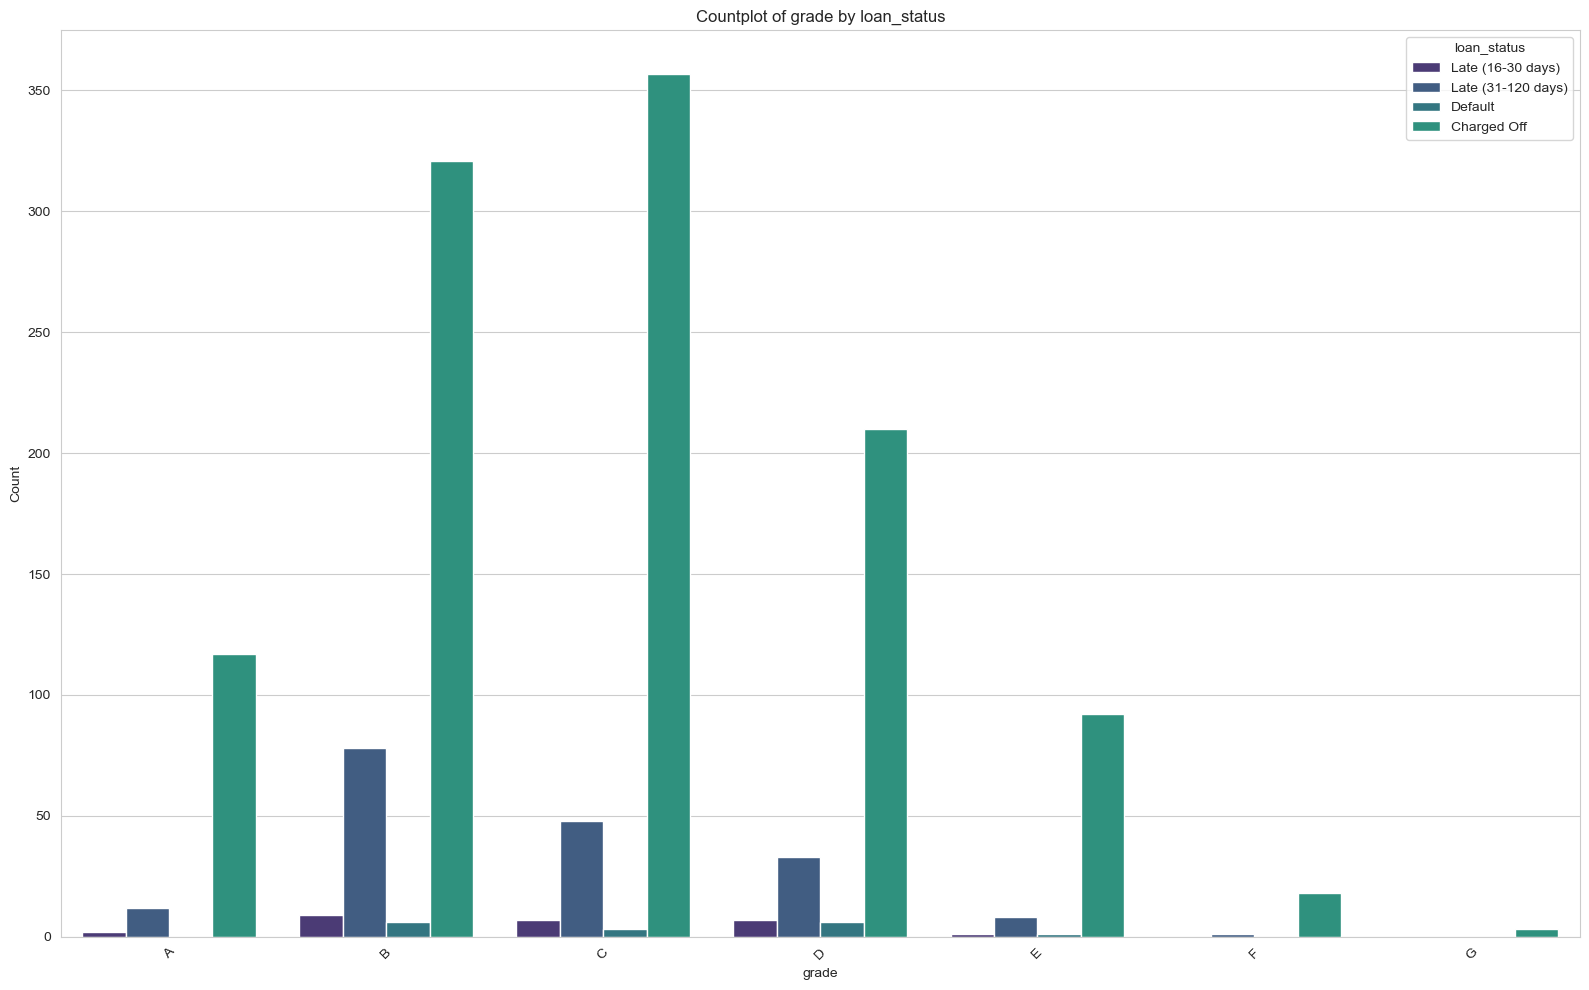

In [75]:
plotter_all_unpaid = Plotter(df_all_unpaid)

hue_order2 = [
        "Late (16-30 days)",
        "Late (31-120 days)",
        "Default",
        "Charged Off",]

plotter_all_unpaid.countplot("grade", hue="loan_status", figsize=(16,10), hue_order=hue_order2)





*above* Here all other categories but the unpaid categories have been removed and then shown using a countplot for more focused viualization. You can see the large increase in abosolute numbers between charged off and A-C grades before decling. And the increase of late late loans, between A and B before declining, And the relative small size of late early, and the almost non-existant size of default.

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_39719/2775387984.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby([categorical_column, status_column]).size().unstack(fill_value=0)
/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_39719/4138569390.py:23: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette,


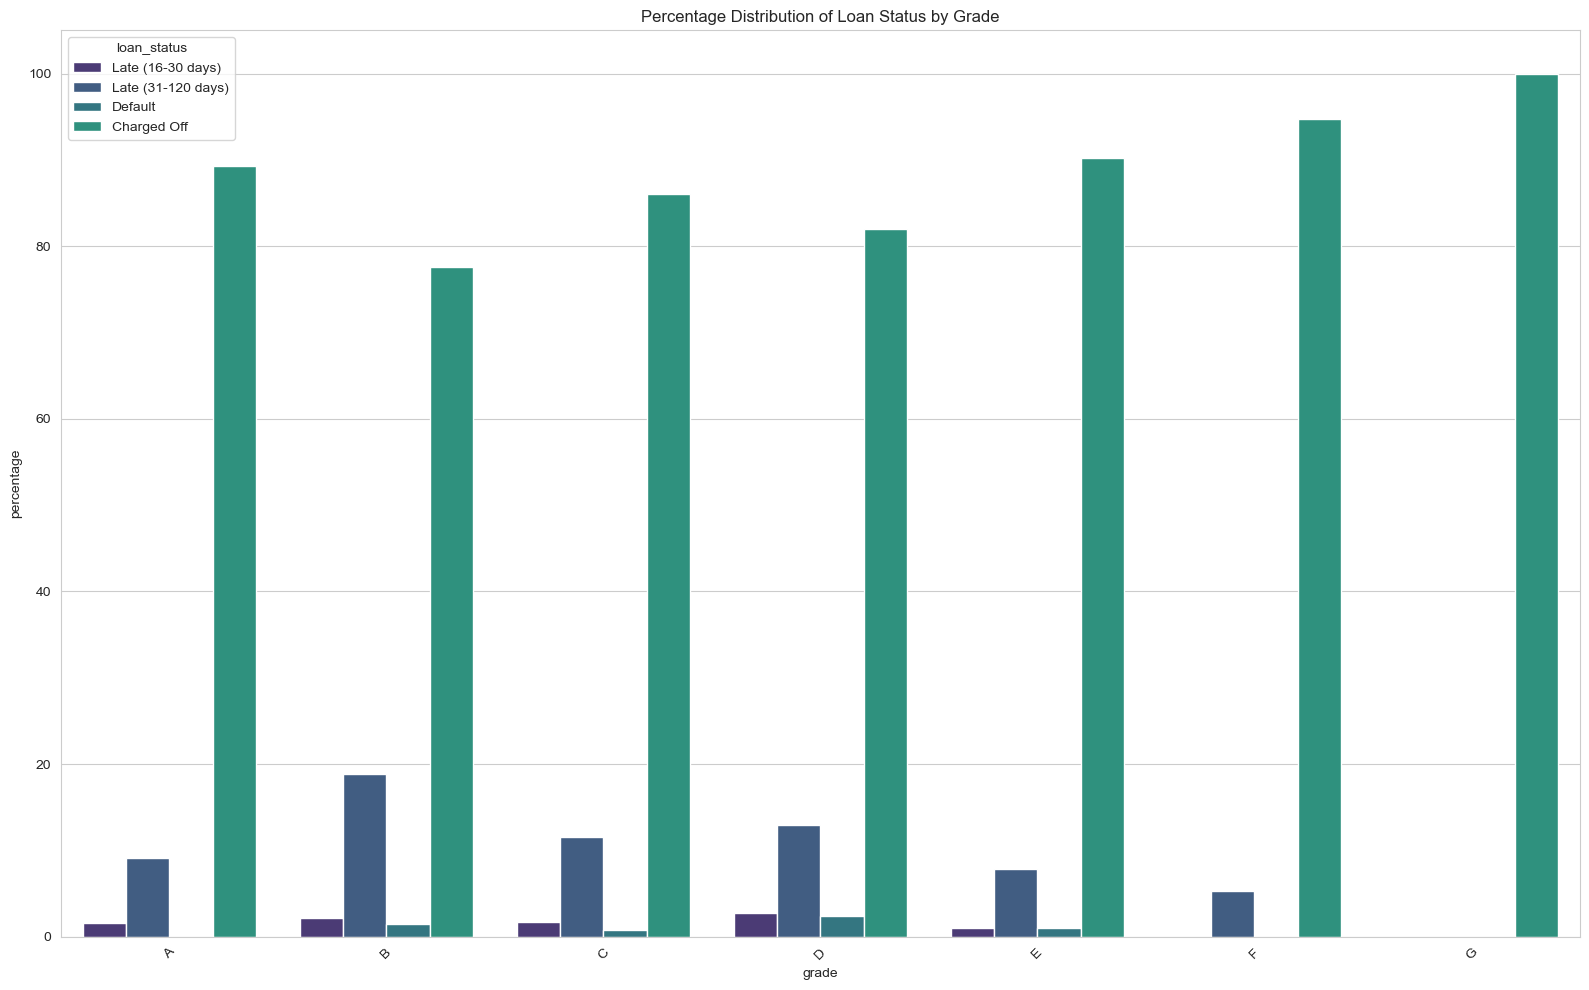

In [76]:
df_grade_barplot_reduced = loan_status_percentages(df_all_unpaid, categorical_column="grade")


melted_df_grade_barplot_reduced = df_grade_barplot_reduced.melt(id_vars=["grade"], var_name="loan_status", value_name="percentage")

plotter_grade_unpaid = Plotter(melted_df_grade_barplot_reduced)

plotter_grade_unpaid.barplot(
    x="grade",
    y="percentage",
    hue="loan_status",
    hue_order=hue_order2,
    title="Percentage Distribution of Loan Status by Grade",
    figsize=(16, 10),
)


*above* The same as before with but with % distribution, with other cateogories removed. 

In [115]:
contingency_table = pd.crosstab(df_fin["grade"], df_fin["loan_status"])

contingency_table

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
grade,,,,,,,,,
A,117,1565,0,2,6,3309,8,2,12
B,321,3084,6,1,14,4023,33,9,78
C,357,1833,3,3,14,2268,26,7,48
D,210,903,6,1,13,1204,21,7,33
E,92,272,1,0,9,390,7,1,8
F,18,44,0,0,6,85,0,0,1
G,3,6,0,0,0,8,0,0,0


*above* a contingency table df that shows the counts for each grade by loan_status. The information we have already seen in a countplot but in df format. 

In [78]:

def chi_square_test(df, col1, col2):

    contingency_table = pd.crosstab(df[col1], df[col2]) # creates a contingency table.

    chi2, p, dof, expected = chi2_contingency(contingency_table) # use chi2 function. 

    total_obv = expected.sum() # total number of obvs

    
    
    results = {
        "Chi-Square Statistic": chi2,
        "P-Value": p,
        "Degrees of Freedom": dof,
        "Total n0 of Oberservations" : total_obv

    } # dict for df 1 - shows summary stats. 

    results_df = pd.DataFrame([results])
    
    expected_df = pd.DataFrame(
        expected, 
        index=contingency_table.index, 
        columns=contingency_table.columns
    ) # df that shows expected results for normal distribution  per cell 
        
    return results_df, expected_df, contingency_table




*above* As we have two categorical varibles loan_status and grade we want to test for a corralation then chi2 is an appropiate test to use. Here I return 3 results: the summay results df, which include the chi2 statistic, P-value, degrees of freedom of dataset and total observations. The expected results of normal distribution for each cell of the df e.g A-current, B-current etc. The acutual results of the observations for each cell. This can be visually compared too the expected and the differences help understand the P-value etc. 

In [79]:

def chi_square_gof(df, col, expected_proportions=None):
    # above, allows the expected proportion to be altered for speific distributions if wanted.

    col_cat_counts = df[col].value_counts().sort_index() #value counts for each column 
    if expected_proportions is None:
        expected_proportions = [1 / len(col_cat_counts)] * len(col_cat_counts)
    # if dis is unspecified uses equation to spilt count equally by category for equal distribution. 

    total_observations = col_cat_counts.sum() # total obvs
    expected_frequencies = [p * total_observations for p in expected_proportions]
    # above, takes the sum of each coluumn count and * expected proportion for each category for expected frequency

    chi2, p = chisquare(f_obs=col_cat_counts, f_exp=expected_frequencies)
    dof = len(col_cat_counts) - 1 

    results_df = pd.DataFrame({
        "Chi-Square Statistic": [chi2],
        "P-Value": [p],
        "Degrees of Freedom": [dof],
        "Total Observations": [total_observations]
    }) # summary df

    frequencies_df = pd.DataFrame({
        "Category": col_cat_counts.index,
        "Observed Frequency": col_cat_counts.values,
        "Expected Frequency": expected_frequencies
    }) # cell df containing both observed vs expected frequency. 

    
    return results_df, frequencies_df


*above* same as above but for use when there is only one category in one of the variables. Compares to see if distribution fits
And imginary distribution in this case a normal equal distribution. 

In [80]:
grade_results_df, grade_expected_df, grade_actual_df = chi_square_test(df_all_unpaid, col1="loan_status", col2="grade")

grade_results_df 


,Chi-Square Statistic,P-Value,Degrees of Freedom,Total n0 of Oberservations
0,27.066382,0.077759,18,1340.0


*above* Running the chi2 with loan_status vs grade. Results show a P-value and statistical significance (ss) above the
0.05 alpha. So loan_status as a whole category there isn't ss between grades, however this is not split by sub-category of either loan_status or grade, and the P-value is on the threshold. 


In [81]:
grade_expected_df

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,109.297015,345.411940,346.246269,213.588060,85.101493,15.852239,2.502985
Default,1.564179,4.943284,4.955224,3.056716,1.217910,0.226866,0.035821
Late (16-30 days),2.541791,8.032836,8.052239,4.967164,1.979104,0.368657,0.058209
Late (31-120 days),17.597015,55.611940,55.746269,34.388060,13.701493,2.552239,0.402985


In [82]:
grade_actual_df

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,117,321,357,210,92,18,3
Default,0,6,3,6,1,0,0
Late (16-30 days),2,9,7,7,1,0,0
Late (31-120 days),12,78,48,33,8,1,0


*above* Here we can see both the expected distributions and the acutal distributions in df format. Note the difference is biggest
in the B column for both late late and charged off loans. 

In [100]:

grade_distribution = df_charged_off["grade"].value_counts(normalize=True) * 100
print(grade_distribution) # charged off loan distribution vs grade. 
# note a low distribution for A, but also for E F and G. 


grade
C    31.932021
B    28.711986
D    18.783542
A    10.465116
E     8.228980
F     1.610018
G     0.268336
Name: proportion, dtype: float64


/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_39719/2009951656.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True,


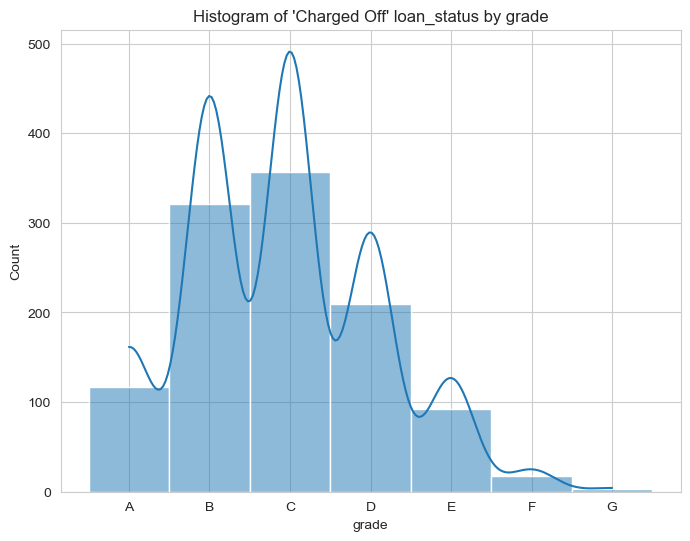

In [117]:
plotter_charged_off = Plotter(df_charged_off)

plotter_charged_off.histogram("grade", title="Histogram of 'Charged Off' loan_status by grade")

*above* we can seee here with a visualization of charged off loans that distibution alonge the grades follow
A positive skew. 

In [85]:
grade_x2gof_sum_char, grade_x2gof_res_char = chi_square_gof(df_charged_off, "grade")

grade_x2gof_sum_char

,Chi-Square Statistic,P-Value,Degrees of Freedom,Total Observations
0,742.046512,5.090503e-157,6,1118


*above* running chi2 gof for just charged off loans vs grade produced a very low P-value and highly ss result vs a equal distirbution.
Howver as this assume equal distribution we shouldn't read too much into without futher analysis which is beyond the scope of this task.

In [86]:
grade_x2gof_res_char

,Category,Observed Frequency,Expected Frequency
0,A,117,159.714286
1,B,321,159.714286
2,C,357,159.714286
3,D,210,159.714286
4,E,92,159.714286
5,F,18,159.714286
6,G,3,159.714286


*above* Here we have the df showing the observed vs expected for the chi2 gof. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_39719/2009951656.py:23: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette,


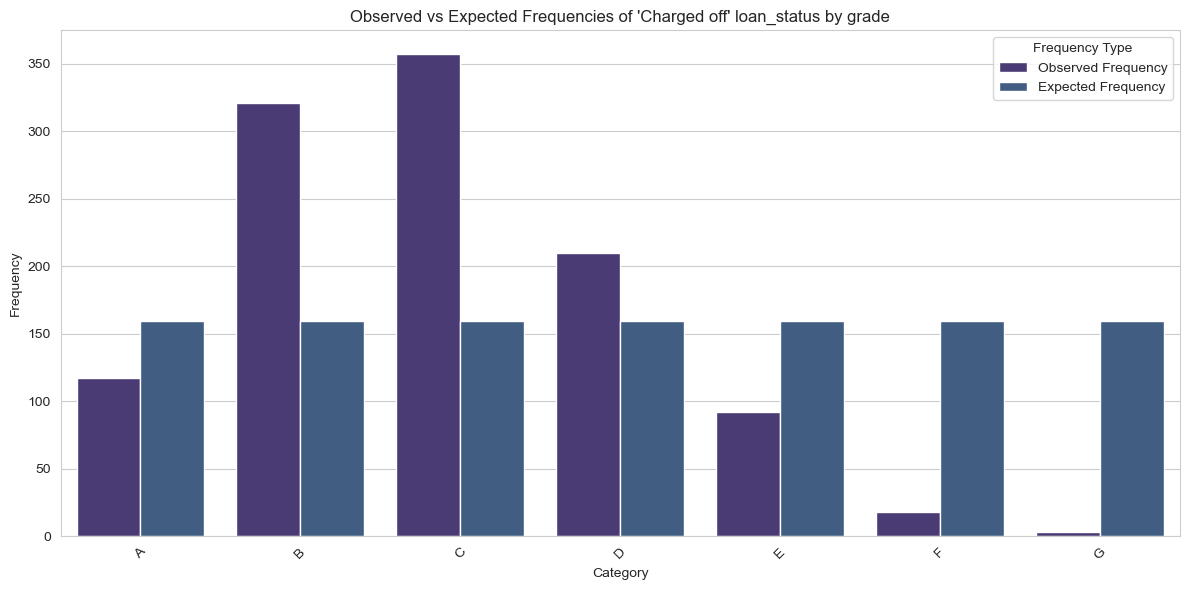

In [118]:

grade_x2gof_melted = grade_x2gof_res_char.melt( # melt data so bar char can be used. 
    id_vars="Category",
    var_name="Frequency Type", 
    value_name="Frequency"      
)
plotter_bar_char = Plotter(grade_x2gof_melted)

plotter_bar_char.barplot(
    x="Category",
    y="Frequency",
    hue="Frequency Type",  # Different bars for Observed and Expected
    title="Observed vs Expected Frequencies of 'Charged off' loan_status by grade",
    figsize=(12, 6)
)


*above* Here is observed and expected of charged off loan_status vs grade plotted in a bar chart for visualization.
Note the postive skew. I personlly would of expected the opposite and negative skew with lower grade loans more likely to be charged off.
But this data also is total counts and not %

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_39719/4138569390.py:23: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette,


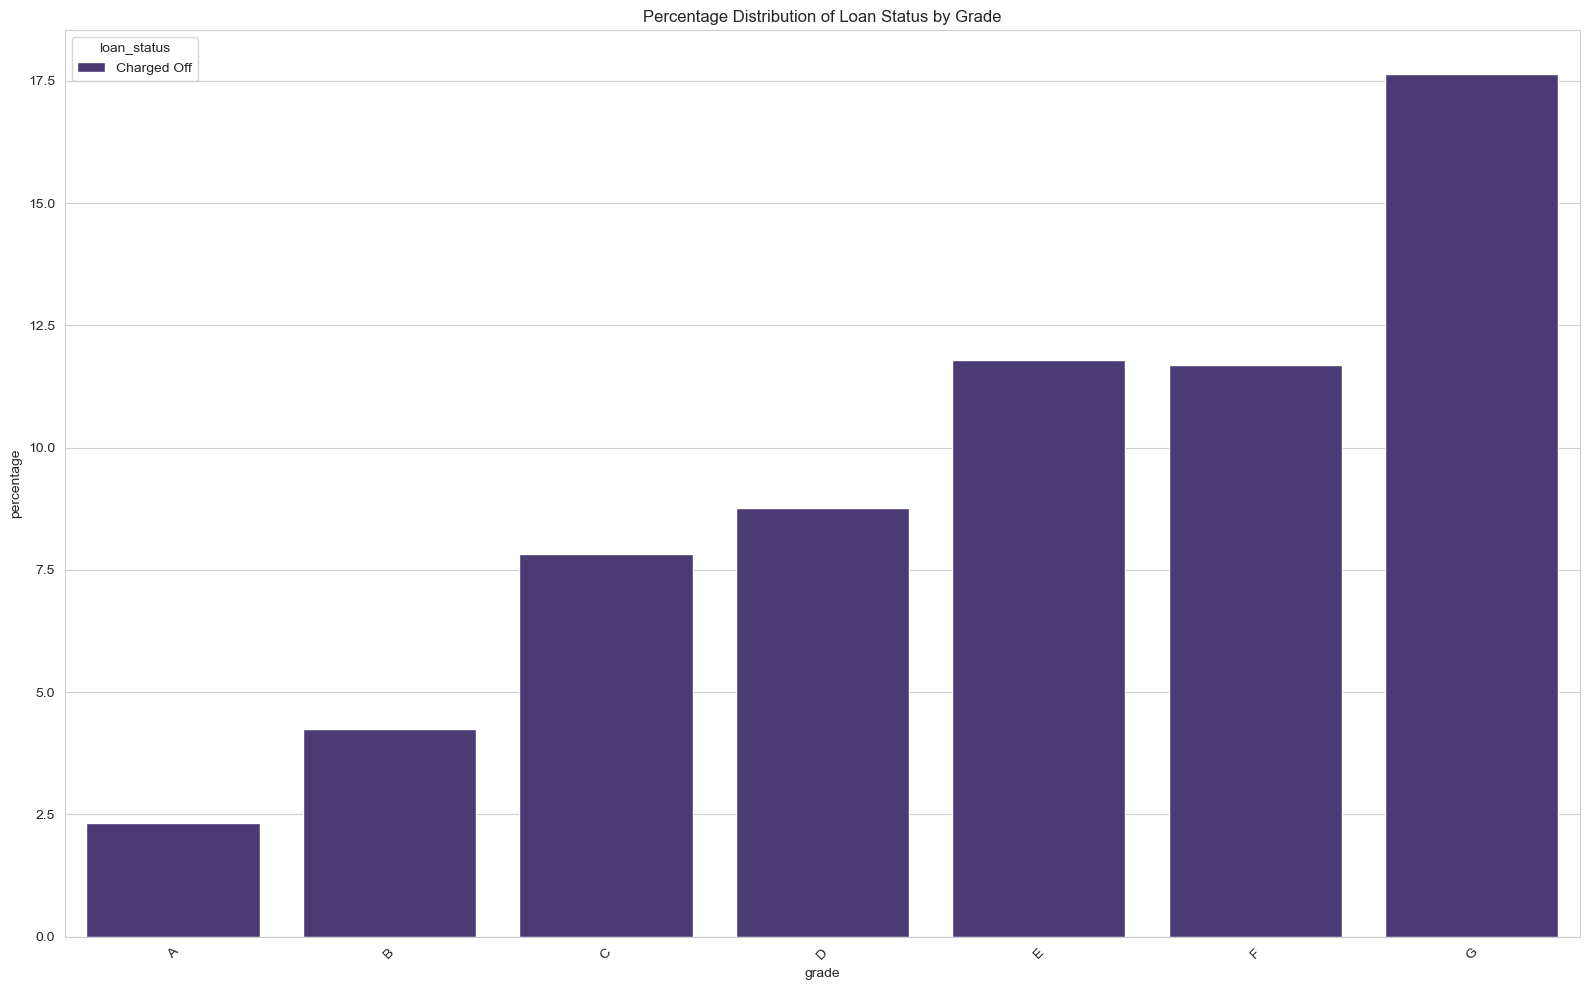

In [90]:

charged_off_only = melted_df_grade_barplot[melted_df_grade_barplot["loan_status"] == "Charged Off"]

plotter_grade_char = Plotter(charged_off_only)

plotter_grade_char.barplot(
    x="grade",
    y="percentage",
    hue="loan_status",
    title="Percentage Distribution of Loan Status by Grade",
    figsize=(16, 10),
)


*above* view of the charged off loan as % of grade without other categories. You can see the increase of % by grade.

In [91]:
grade_distribution = df_all_late_default["grade"].value_counts(normalize=True) * 100
print(grade_distribution)

grade
B    41.891892
C    26.126126
D    20.720721
A     6.306306
E     4.504505
F     0.450450
G     0.000000
Name: proportion, dtype: float64


*above* looking at all late payment columns (late early, late late, defualt) count distributon by grade.

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_39719/2009951656.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True,


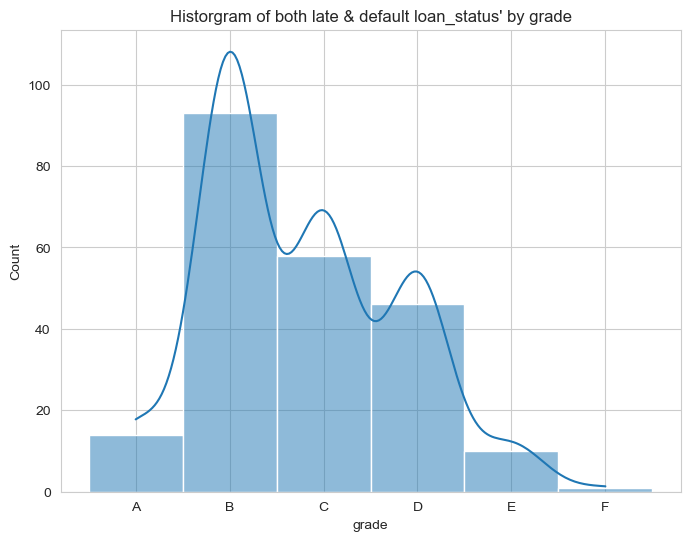

In [119]:
plotter_all_late_default = Plotter(df_all_late_default)

plotter_all_late_default.histogram("grade", title="Historgram of both late & default loan_status' by grade")

*above* viewed as a histogram. Postive skew. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_39719/4138569390.py:23: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette,


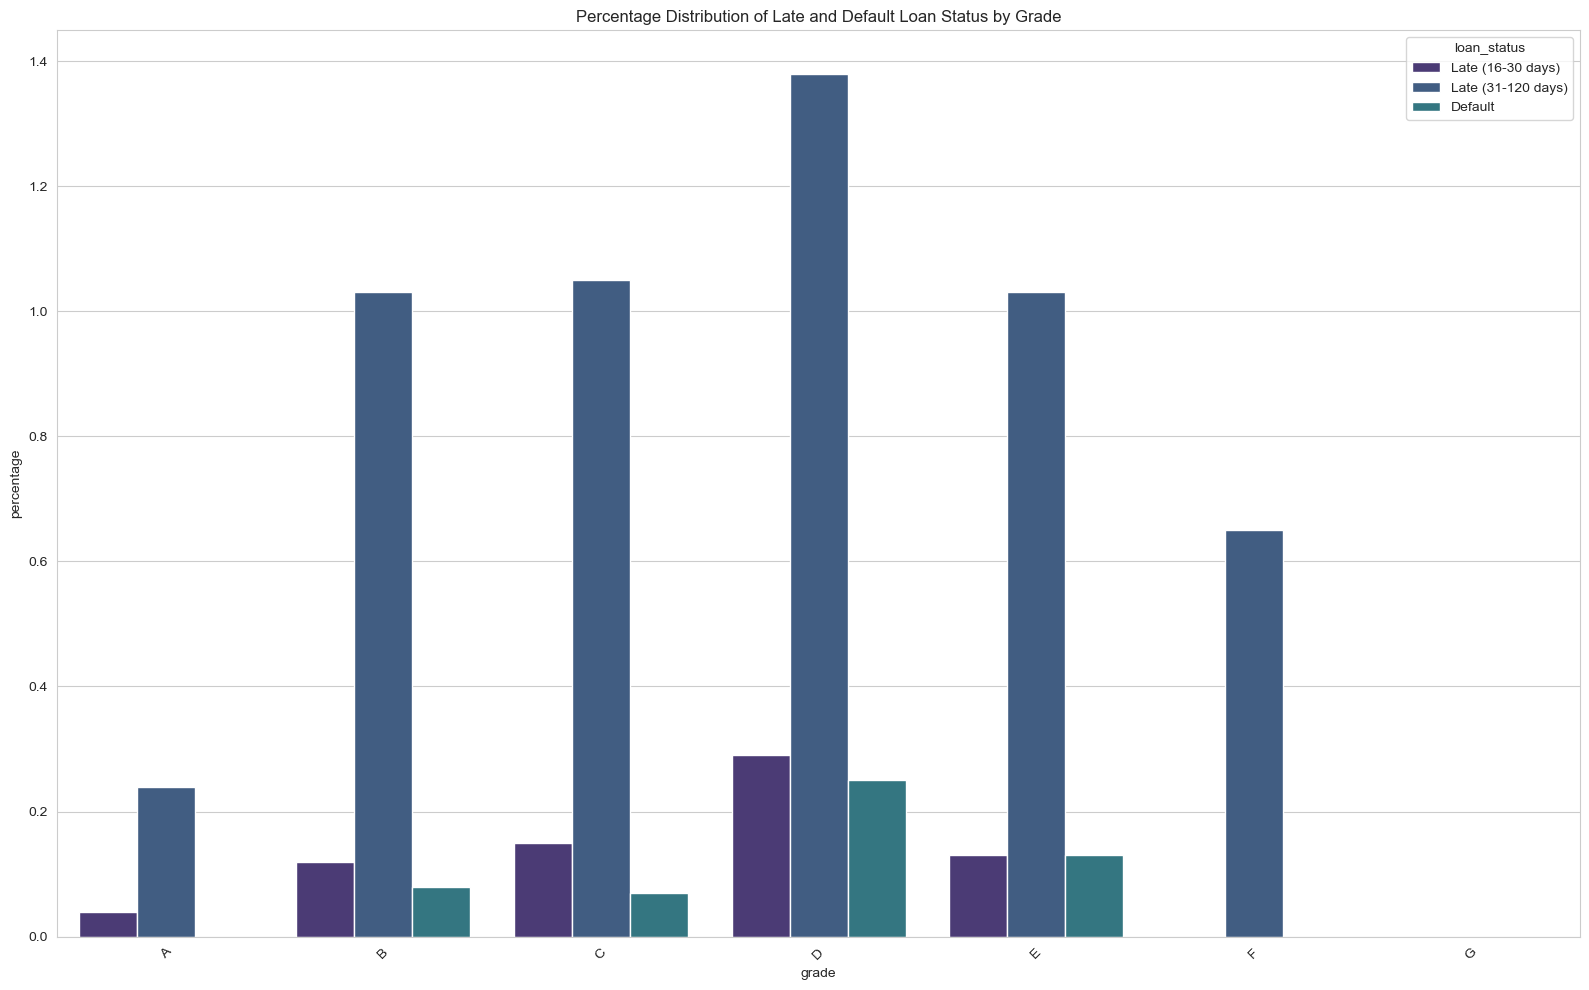

In [97]:
all_late_def = melted_df_grade_barplot[melted_df_grade_barplot["loan_status"].isin(
    ["Late (16-30 days)", "Late (31-120 days)", "Default"]
)]

plotter_grade_late_df = Plotter(all_late_def)

plotter_grade_late_df.barplot(
    x="grade",
    y="percentage",
    hue="loan_status",
    title="Percentage Distribution of Late and Default Loan Status by Grade",
    figsize=(16, 10),
)




*above* Both late and default loan_status % of each grade without other categories.

In [362]:
grade_x2sum_all_late_def, grade_x2exp_all_late_def, grade_x2act_all_late_def = chi_square_test(df_all_late_default, col1="loan_status", col2="grade")

grade_x2sum_all_late_def

,Chi-Square Statistic,P-Value,Degrees of Freedom,Total n0 of Oberservations
0,5.496339,0.855657,10,222.0


*above* P-value not ss 

In [324]:
grade_x2exp_all_late_def

grade,A,B,C,D,E,F
loan_status,,,,,,
Default,1.009009,6.702703,4.180180,3.315315,0.720721,0.072072
Late (16-30 days),1.639640,10.891892,6.792793,5.387387,1.171171,0.117117
Late (31-120 days),11.351351,75.405405,47.027027,37.297297,8.108108,0.810811


In [325]:
grade_x2act_all_late_def

grade,A,B,C,D,E,F
loan_status,,,,,,
Default,0,6,3,6,1,0
Late (16-30 days),2,9,7,7,1,0
Late (31-120 days),12,78,48,33,8,1


*Above* can compare expected and observed frequencies. Don't deviate much. 

In [326]:
grade_distribution_late_late = df_late_late["grade"].value_counts(normalize=True) * 100

print(grade_distribution_late_late) # late late distribution by grade. 

grade
B    43.333333
C    26.666667
D    18.333333
A     6.666667
E     4.444444
F     0.555556
G     0.000000
Name: proportion, dtype: float64


/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_39719/2009951656.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True,


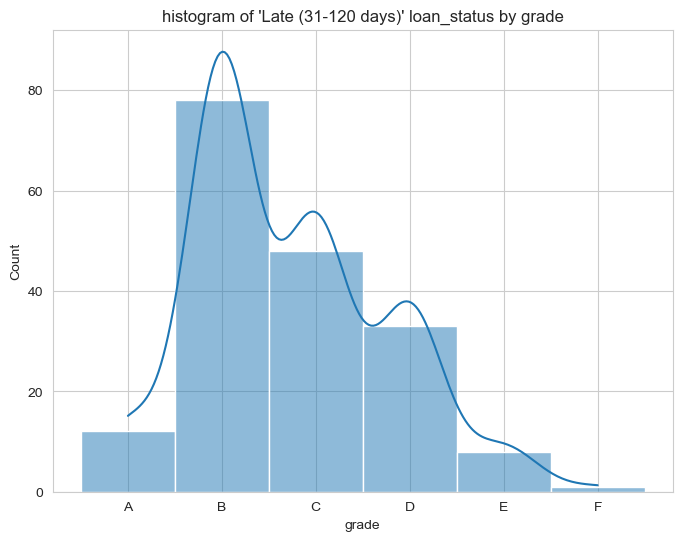

In [120]:
plotter_late_late = Plotter(df_late_late)

plotter_late_late.histogram("grade", title="histogram of 'Late (31-120 days)' loan_status by grade") # postive skew. 

In [40]:
grade_x2gof_sum_late_late, grade_x2gof_res_late_late = chi_square_gof(df_late_late, "grade")

grade_x2gof_sum_late_late # quite ss P-value way below alpha. But is ofc based on equal distribution, so unsure how useful in context.

,Chi-Square Statistic,P-Value,Degrees of Freedom,Total Observations
0,196.677778,9.665310e-40,6,180


In [41]:
grade_x2gof_res_late_late # compared the distribution. 

,Category,Observed Frequency,Expected Frequency
0,A,12,25.714286
1,B,78,25.714286
2,C,48,25.714286
3,D,33,25.714286
4,E,8,25.714286
5,F,1,25.714286
6,G,0,25.714286


/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_39719/2009951656.py:23: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette,


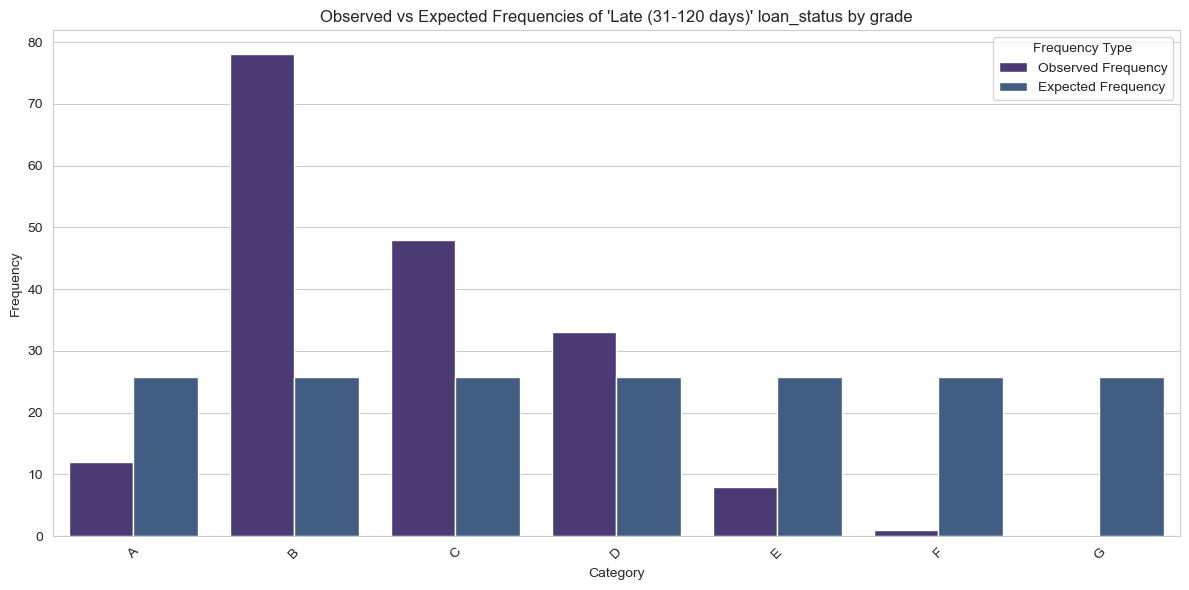

In [121]:
grade_x2gof_melted2 = grade_x2gof_res_late_late.melt(
    id_vars="Category",
    var_name="Frequency Type", 
    value_name="Frequency"      
)
plotter_bar_char = Plotter(grade_x2gof_melted2)

plotter_bar_char.barplot(
    x="Category",
    y="Frequency",
    hue="Frequency Type",  
    title="Observed vs Expected Frequencies of 'Late (31-120 days)' loan_status by grade",
    figsize=(12, 6)
)

*above* late late viewed in bar chart of count vs grade, observed and predicted for equal dist. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_39719/4138569390.py:23: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette,


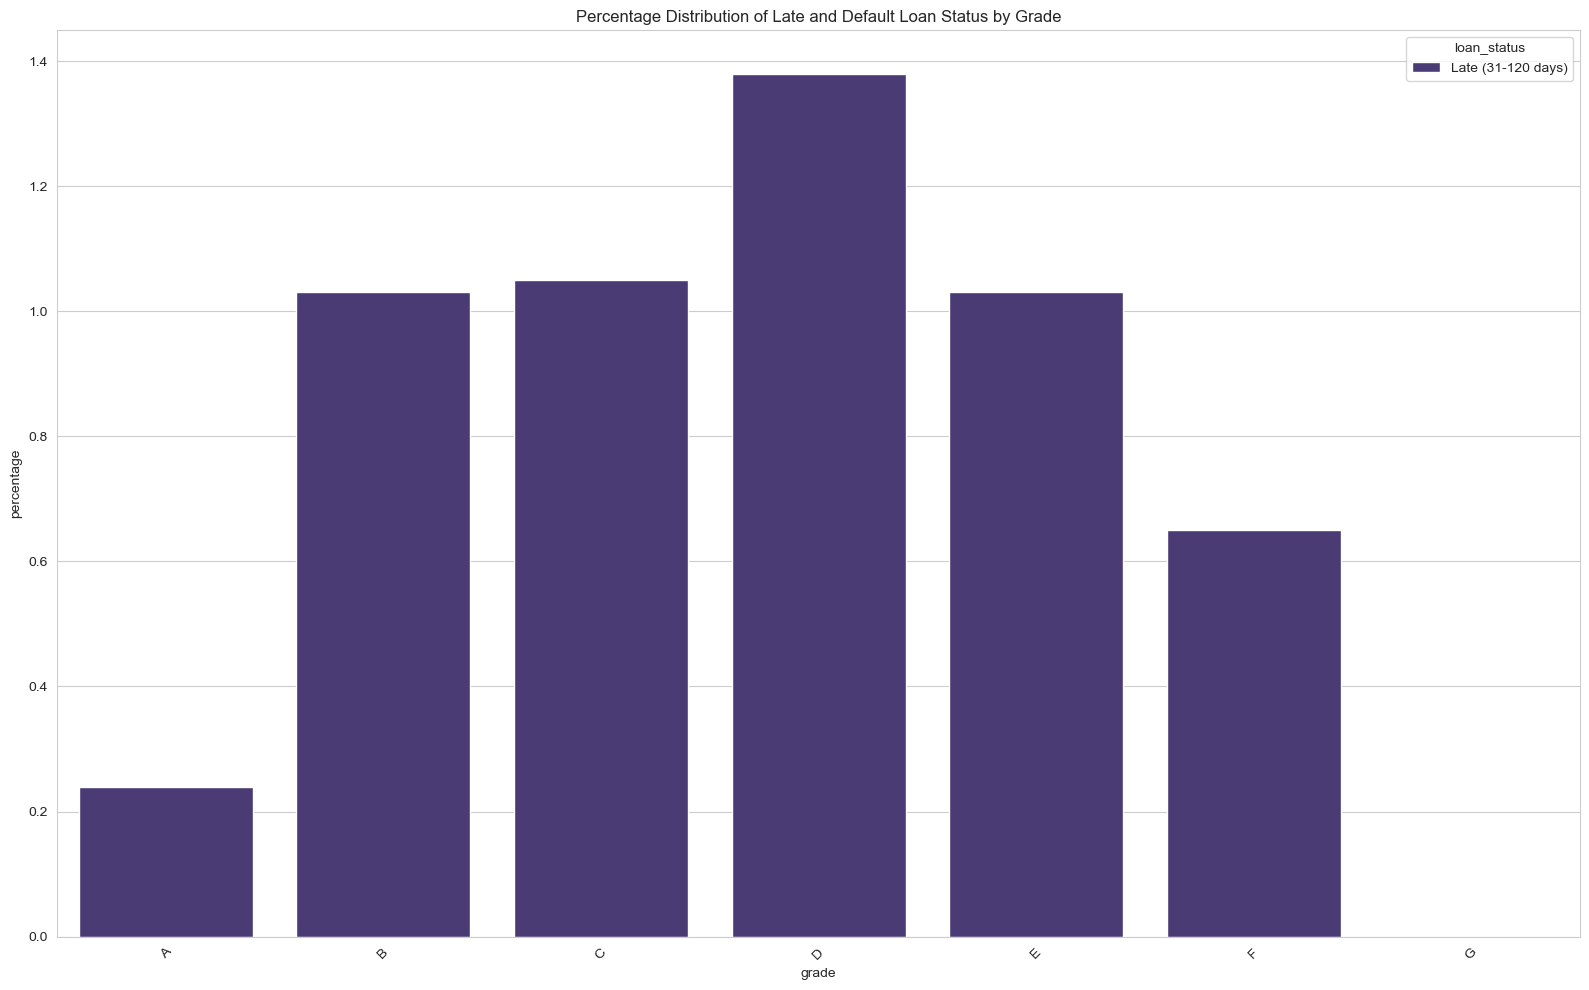

In [98]:
late_late = melted_df_grade_barplot[melted_df_grade_barplot["loan_status"] =="Late (31-120 days)"]

plotter_grade_late_late = Plotter(late_late)

plotter_grade_late_late.barplot(
    x="grade",
    y="percentage",
    hue="loan_status",
    title="Percentage Distribution of Late and Default Loan Status by Grade",
    figsize=(16, 10),
)


*above* late late loan_status % total of grade in barplot. 

In [43]:
grade_x2res_late_late_char, grade_x2exp_late_late_char, grade_x2act_late_late_char = chi_square_test(df_late_late_charged_off, col1="loan_status", col2="grade")

grade_x2res_late_late_char # chi2 for charged off and late late, P-value below the alpha.

,Chi-Square Statistic,P-Value,Degrees of Freedom,Total n0 of Oberservations
0,18.970556,0.004214,6,1298.0


In [44]:
grade_x2exp_late_late_char # expected 

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,111.11094,343.668721,348.836672,209.302003,86.132512,16.365177,2.583975
Late (31-120 days),17.88906,55.331279,56.163328,33.697997,13.867488,2.634823,0.416025


In [45]:
grade_x2act_late_late_char # actual. 

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,117,321,357,210,92,18,3
Late (31-120 days),12,78,48,33,8,1,0


Summary conclusion:

Going through the data we draw some insights. We can see that overall grade has a correlation with loan_status, but not a ss one as shown.
When loan_status was broken down, 'Late (16-30 days)' observed results did not ss differ from from the expected. However when both 'Late (31-120 days)' & 'Charged Off' loan_status' were broken down by grade there was a statistically significant result and a correlation. This was the case for both independantly and together. 'Default' wasn't analysed as its counts were too small for analysis to be very informative. For 'Charged Off' the % of the total counts for loan_status for each grade increased as the grade decreased. For 'Late (31-120 days)' it increased from A-D and decreased hereafter. The distribution of counts for all of the loan_status by grade followed a postively skewed distibution, with the biggest counts being in the 'B' grade. This also is where both 'Late (31-120 days)' and 'Charged off' differed from the expected chi2 result the most. However I am not sure if the chi2 goodnesss of fit test, using an equal distribution was the most robust way to test the single category data, and if this distribution is accurate, and cannot draw to much. Futher analysis would be needed.

For futher analysis using this data I would want to find out the details of how grades are determined by the loan company and that apply that knowledge to understand the grade breakdown. I would also look to understand why the grade data counts are postively skewed going from good to bad grades. I would also aim to find out if other categories, such as home ownership, affect both the loan_status category by grade together, and if this has an effect on determining the grade as well as the loan_status. And then do a futher breakdown by subgrade for more detail. This could all be combined with other column analysis to try paint a robust picture of factors that correlate and seemingly affect loan_status, and likelyhood a loan is paid back in full, or to what degree. 